<table>
    <tr>
        <td><img src="./img/Macc.png" width="auto"/></td>
        <td>
            <table><tr>
            <h1 style="color:blue;text-align:center">Lógica para Ciencias de la Computación</h1></td>
            </tr></table>   
        <td>&nbsp;</td>
        <td>
            <table><tr>
            <tp><p style="font-size:150%;text-align:center">Taller</p></tp>
            <tp><p style="font-size:150%;text-align:center">Solución de problemas</p></tp>
            </tr></table>
        </td>
    </tr>
</table>

---

# Objetivo <a class="anchor" id="inicio"></a>

En clase hemos visto el siguiente esquema del procedimiento para solucionar problemas:

<img src="./img/mapa.png" width="400px"/>

Implementaremos este esquema en Python usando las herramientas desarrolladas hasta este momento.

# Secciones

1. [Problema ilustrativo.](#prob)
2. [Implementación de las restricciones.](#forms)
3. [Visualización.](#vis)
4. [Solución mediante SATtabla.](#sat)
5. [Un problema más difícil.](#prob2)
6. [Situaciones más complejas y comparación de tiempos.](#comp)

# Problema de ejemplo <a class="anchor" id="prob"></a>

([Volver al inicio](#inicio))

Comenzaremos con el problema presentado en las diapositivas de clase, que repetimos aquí por conveniencia:

<img src="./img/problema.png" width="400px"/>

Las restricciones y su representación usando lógica proposicional son las siguientes:

1. Debe haber exactamente tres caballos en el tablero:

$$\bigvee_{(x_1,y_1)\in\texttt{Casillas}}\bigvee_{(x_2,y_2)\neq(x_1,y_1)}\bigvee_{{(x_3,y_3)\neq(x_1,y_1)\\(x_3,y_3)\neq(x_2,y_2)}}\left(CenC_{(x_1,y_1)}\wedge CenC_{(x_2,y_2)}\wedge CenC_{(x_3,y_3)}\right)$$

2. Ningún caballo debe poder atacar a otro.

\begin{align*}
&CenC_{(0,0)}\to \neg(CenC_{(1,2)} \vee CenC_{(2,1)})\\
&CenC_{(1,0)}\to \neg(CenC_{(0,2)} \vee CenC_{(2,2)})\\
&CenC_{(2,0)}\to \neg(CenC_{(1,2)} \vee CenC_{(0,1)})\\
&CenC_{(0,1)}\to \neg(CenC_{(2,2)} \vee CenC_{(2,0)})\\
&CenC_{(2,1)}\to \neg(CenC_{(0,2)} \vee CenC_{(0,0)})\\
&CenC_{(0,2)}\to \neg(CenC_{(1,0)} \vee CenC_{(2,1)})\\
&CenC_{(1,2)}\to \neg(CenC_{(0,0)} \vee CenC_{(2,0)})\\
&CenC_{(2,2)}\to \neg(CenC_{(0,1)} \vee CenC_{(1,0)})\\
\end{align*}


3. Debe haber un caballo en la casilla $(1,2)$.

$$CenC_{(1,2)}$$

## Implementación de las restricciones <a class="anchor" id="forms"></a>

([Volver al inicio](#inicio))

En la librería `Problemas` hemos implementado las tres reglas. Puede correr el siguiente código para visualizar el resultado, y puede entrar a la librería para explorar la implementación:

In [1]:
from Problemas import Caballos
from Logica import *

In [2]:
c = Caballos()

Observe que el objeto tiene un atributo `reglas`, en el cual está una lista con las tres reglas implementadas en Python:

In [3]:
c.reglas

['((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((ĀYă)YĆ)Y(((((-āY-Ą)Y-ć)Y-Ă)Y-ą)Y-Ĉ))O(((ĀYă)Yā)Y(((((-ĆY-Ą)Y-ć)Y-Ă)Y-ą)Y-Ĉ)))O(((ĀYă)YĄ)Y(((((-ĆY-ā)Y-ć)Y-Ă)Y-ą)Y-Ĉ)))O(((ĀYă)Yć)Y(((((-ĆY-ā)Y-Ą)Y-Ă)Y-ą)Y-Ĉ)))O(((ĀYă)YĂ)Y(((((-ĆY-ā)Y-Ą)Y-ć)Y-ą)Y-Ĉ)))O(((ĀYă)Yą)Y(((((-ĆY-ā)Y-Ą)Y-ć)Y-Ă)Y-Ĉ)))O(((ĀYă)YĈ)Y(((((-ĆY-ā)Y-Ą)Y-ć)Y-Ă)Y-ą)))O(((ĀYĆ)Yā)Y(((((-ăY-Ą)Y-ć)Y-Ă)Y-ą)Y-Ĉ)))O(((ĀYĆ)YĄ)Y(((((-ăY-ā)Y-ć)Y-Ă)Y-ą)Y-Ĉ)))O(((ĀYĆ)Yć)Y(((((-ăY-ā)Y-Ą)Y-Ă)Y-ą)Y-Ĉ)))O(((ĀYĆ)YĂ)Y(((((-ăY-ā)Y-Ą)Y-ć)Y-ą)Y-Ĉ)))O(((ĀYĆ)Yą)Y(((((-ăY-ā)Y-Ą)Y-ć)Y-Ă)Y-Ĉ)))O(((ĀYĆ)YĈ)Y(((((-ăY-ā)Y-Ą)Y-ć)Y-Ă)Y-ą)))O(((ĀYā)YĄ)Y(((((-ăY-Ć)Y-ć)Y-Ă)Y-ą)Y-Ĉ)))O(((ĀYā)Yć)Y(((((-ăY-Ć)Y-Ą)Y-Ă)Y-ą)Y-Ĉ)))O(((ĀYā)YĂ)Y(((((-ăY-Ć)Y-Ą)Y-ć)Y-ą)Y-Ĉ)))O(((ĀYā)Yą)Y(((((-ăY-Ć)Y-Ą)Y-ć)Y-Ă)Y-Ĉ)))O(((ĀYā)YĈ)Y(((((-ăY-Ć)Y-Ą)Y-ć)Y-Ă)Y-ą)))O(((ĀYĄ)Yć)Y(((((-ăY-Ć)Y-ā)Y-Ă)Y-ą)Y-Ĉ)))O(((ĀYĄ)YĂ)Y(((((-ăY-Ć)Y-ā)Y-ć)Y-ą)Y-Ĉ)))O(((ĀYĄ)Yą)Y(((((-ăY-Ć)Y-ā)Y-ć)Y-Ă)Y-Ĉ)))O(((ĀYĄ)YĈ)Y(((((-ăY-Ć)Y-ā)Y-ć)Y-Ă)Y-ą)))O(((ĀYć)YĂ)Y(((

La clase `Caballos` crea de una vez el descriptor, mediante el cual podemos decodificar las letras:

In [4]:
c.CenC.escribir('ć')

'El caballo está en la casilla (1,2)'

También podemos revisar regla por regla. Observe que las fórmulas incluyen un método `ver` para visualizar más fácilmente las reglas:

In [5]:
A = inorder_to_tree(c.reglas[1])
print(A.ver(c.CenC))

((((((((El caballo está en la casilla (0,0) >  no (El caballo está en la casilla (1,2) O El caballo está en la casilla (2,1))) Y (El caballo está en la casilla (1,0) >  no (El caballo está en la casilla (0,2) O El caballo está en la casilla (2,2)))) Y (El caballo está en la casilla (2,0) >  no (El caballo está en la casilla (1,2) O El caballo está en la casilla (0,1)))) Y (El caballo está en la casilla (0,1) >  no (El caballo está en la casilla (2,2) O El caballo está en la casilla (2,0)))) Y (El caballo está en la casilla (2,1) >  no (El caballo está en la casilla (0,2) O El caballo está en la casilla (0,0)))) Y (El caballo está en la casilla (0,2) >  no (El caballo está en la casilla (1,0) O El caballo está en la casilla (2,1)))) Y (El caballo está en la casilla (1,2) >  no (El caballo está en la casilla (0,0) O El caballo está en la casilla (2,0)))) Y (El caballo está en la casilla (2,2) >  no (El caballo está en la casilla (0,1) O El caballo está en la casilla (1,0))))


In [6]:
A = inorder_to_tree(c.reglas[0])
print(A.ver(c.CenC))

((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((El caballo está en la casilla (0,0) Y El caballo está en la casilla (0,1)) Y El caballo está en la casilla (0,2)) Y ((((( no El caballo está en la casilla (1,0) Y  no El caballo está en la casilla (1,1)) Y  no El caballo está en la casilla (1,2)) Y  no El caballo está en la casilla (2,0)) Y  no El caballo está en la casilla (2,1)) Y  no El caballo está en la casilla (2,2))) O (((El caballo está en la casilla (0,0) Y El caballo está en la casilla (0,1)) Y El caballo está en la casilla (1,0)) Y ((((( no El caballo está en la casilla (0,2) Y  no El caballo está en la casilla (1,1)) Y  no El caballo está en la casilla (1,2)) Y  no El caballo está en la casilla (2,0)) Y  no El caballo está en la casilla (2,1)) Y  no El caballo está en la casilla (2,2)))) O (((El caballo está en la casilla (0,0) Y El caballo está en la casilla (0,1)) Y El caballo está en la casilla (1,1)) Y ((((( no El caballo está en la ca

## Visualización <a class="anchor" id="vis"></a>

([Volver al inicio](#inicio))

Una parte muy importante de la clase `Caballos` es el método que permite visualizar el tablero, dada una interpretación de las reglas proposicionales. Esto es lo que nos permite entender la solución del problema.

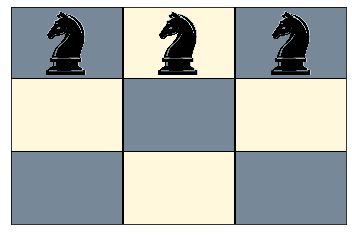

In [7]:
I = {c.CenC.P([0,2]):True, c.CenC.P([1,2]):True, c.CenC.P([2,2]):True}
c.visualizar(I)

## Solución mediante SATtabla <a class="anchor" id="sat"></a>

([Volver al inicio](#inicio))

Ahora podemos ver el corazón de la solución a este y todos los demas problemas que desarrollemos: un SATsolver. Usaremos el SATtabla que implementamos anteriormente.

In [8]:
%%time
A = inorder_to_tree(Ytoria(c.reglas))
I = A.SATtabla()

CPU times: total: 46.9 ms
Wall time: 50.3 ms


Podemos decodificar el diccionario `I` obtenido para ver la solución:

In [9]:
if I != None:
    for k in I:
        print(c.CenC.escribir(k), I[k])
else:
    print('¡No hay solución!')

El caballo está en la casilla (1,1) True
El caballo está en la casilla (0,0) False
El caballo está en la casilla (2,2) True
El caballo está en la casilla (1,0) False
El caballo está en la casilla (1,2) True
El caballo está en la casilla (0,1) False
El caballo está en la casilla (2,1) False
El caballo está en la casilla (2,0) False
El caballo está en la casilla (0,2) False


O, mejor aún, podemos visualizar la solución:

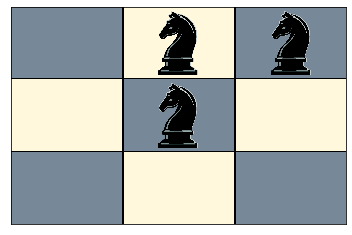

In [10]:
if I != None:
    c.visualizar(I)
else:
    print('¡No hay solución!')

Vemos que la solución encontrada por SATtabla es muy rápida.

---

## Un problema más difícil <a class="anchor" id="prob2"></a>

([Volver al inicio](#inicio))

El propósito de esta sección es tratar de resolver un problema mediante el procedimiento que hemos descrito anteriormente. No obstante, el código presentará algunos problemas que tendremos que afrontar. Esto nos permitirá entrenarnos para afrontar las dificultades que se presentarán en la elaboración del proyecto.

Retomaremos aquí el problema con el que estudiamos la representación de situaciones. Buscamos llenar todas las casillas en una tabla 2x2 con un número de 0 a 3, sin repetir. Por ejemplo:

![ejemplo](img/tabla.png)

Tenemos tres restricciones que debemos implementar para resolver el problema:

1. Un número sólo está en una casilla.

$$\bigwedge_{x\in\{0,1\}}\bigwedge_{y\in\{0,1\}}\bigwedge_{n\in Numeros}\left(OenCasilla_{x,y,n}\to\neg\left(\bigvee_{(u,v)\neq (x,y)} OenCasilla_{u,v,n}\right)\right)$$

2. No hay más de un número en una casilla.

$$\bigwedge_{x\in\{0,1\}}\bigwedge_{y\in\{0,1\}}\bigwedge_{n\in Numeros}\left(OenCasilla_{x,y,n}\to\neg\left(\bigvee_{m\neq n} OenCasilla_{x,y,m}\right)\right)$$

3. Debe haber por lo menos un número en una casilla.

$$\bigwedge_{x\in\{0,1\}}\bigwedge_{y\in\{0,1\}}\left(\bigvee_{n\in Numeros}OenCasilla_{x,y,n}\right)$$


### Errores sintácticos

La implementación, con algunos errores, está en la librería `Problemas`.

In [15]:
from Problemas import Rejilla
from Logica import *

Instanciamos el objeto:

In [17]:
r = Rejilla(N=2, M=2)

Y ahora intentamos visualizar la regla 1:

In [18]:
print(r.reglas[0])
A = inorder_to_tree(r.reglas[0])
print(A.ver(r.NenC))

((((((((((((((((Ā>-((ĈOĄ)OČ))Y(Ĉ>-((ĀOĄ)OČ)))Y(Ą>-((ĀOĈ)OČ)))Y(Č>-((ĀOĈ)OĄ)))Y(ā>-((ĉOą)Oč)))Y(ĉ>-((āOą)Oč)))Y(ą>-((āOĉ)Oč)))Y(č>-((āOĉ)Oą)))Y(Ă>-((ĊOĆ)OĎ)))Y(Ċ>-((ĂOĆ)OĎ)))Y(Ć>-((ĂOĊ)OĎ)))Y(Ď>-((ĂOĊ)OĆ)))Y(ă>-((ċOć)Oď)))Y(ċ>-((ăOć)Oď)))Y(ć>-((ăOċ)Oď)))Y(ď>-((ăOċ)Oć)))
((((((((((((((((El número 0 está en la casilla (0,0) >  no ((El número 0 está en la casilla (0,1) O El número 0 está en la casilla (1,0)) O El número 0 está en la casilla (1,1))) Y (El número 0 está en la casilla (0,1) >  no ((El número 0 está en la casilla (0,0) O El número 0 está en la casilla (1,0)) O El número 0 está en la casilla (1,1)))) Y (El número 0 está en la casilla (1,0) >  no ((El número 0 está en la casilla (0,0) O El número 0 está en la casilla (0,1)) O El número 0 está en la casilla (1,1)))) Y (El número 0 está en la casilla (1,1) >  no ((El número 0 está en la casilla (0,0) O El número 0 está en la casilla (0,1)) O El número 0 está en la casilla (1,0)))) Y (El número 1 está en la casilla (0,0) >  no ((El

Este error aparece en la línea que usa el método `ver` de las fórmulas. No obstante, el método `ver` es correcto. Es decir, el problema no está aquí. Esto lo sabemos porque el error nos dice que un objeto de tipo `None` no tiene el atributo `ver`. Así pues, el error es que `A` es `None`. Corrámos solo la función `inorder_to_tree` para comprobarlo:

In [19]:
A = inorder_to_tree(r.reglas[0])
print(A)

((((((((((((((((Ā>-((ĈOĄ)OČ))Y(Ĉ>-((ĀOĄ)OČ)))Y(Ą>-((ĀOĈ)OČ)))Y(Č>-((ĀOĈ)OĄ)))Y(ā>-((ĉOą)Oč)))Y(ĉ>-((āOą)Oč)))Y(ą>-((āOĉ)Oč)))Y(č>-((āOĉ)Oą)))Y(Ă>-((ĊOĆ)OĎ)))Y(Ċ>-((ĂOĆ)OĎ)))Y(Ć>-((ĂOĊ)OĎ)))Y(Ď>-((ĂOĊ)OĆ)))Y(ă>-((ċOć)Oď)))Y(ċ>-((ăOć)Oď)))Y(ć>-((ăOċ)Oď)))Y(ď>-((ăOċ)Oć)))


Este error en `inorder_to_tree` surge porque la cadena no está bien escrita. Usualmente se debe a que hay un paréntesis faltante o mal puesto.

**Ejercicio 1:**

Revise el siguiénte código que genera la regla 1 y corrija el error. Observe que a la generación de fórmulas le hace falta incluir un paréntesis.

In [16]:
def regla1(self):
    casillas_num = [(n,x,y) for n in range(self.N*self.M) for x in range(self.N) for y in range(self.M)]
    lista = []
    for c in casillas_num:
        n,x,y = c
        otras_casillas = [(x1,y1) for x1 in range(self.N) for y1 in range(self.M) if (x1,y1) != (x,y)]
        lista_o = []
        for k in otras_casillas:
            lista_o.append(self.NenC.P([n,*k]))
        form = '(' + self.NenC.P([*c]) + '>-' + Otoria(lista_o) + ')'
        lista.append(form)
    return Ytoria(lista)

setattr(Rejilla, "regla1", regla1)

---

### Errores semánticos

Un tipo de error más complicado de ver es cuando la regla está correctamente escrita, pero no representa la restricción de manera correcta.

Por ejemplo, la regla 3 está escrita correctamente:

In [25]:
r = Rejilla(N=2)
A = inorder_to_tree(r.reglas[2])
print(A.ver(r.NenC))

((((((El número 0 está en la casilla (0,0) Y El número 1 está en la casilla (0,0)) Y El número 2 está en la casilla (0,0)) Y El número 3 está en la casilla (0,0)) Y (((El número 0 está en la casilla (0,1) Y El número 1 está en la casilla (0,1)) Y El número 2 está en la casilla (0,1)) Y El número 3 está en la casilla (0,1))) Y (((El número 0 está en la casilla (1,0) Y El número 1 está en la casilla (1,0)) Y El número 2 está en la casilla (1,0)) Y El número 3 está en la casilla (1,0))) Y (((El número 0 está en la casilla (1,1) Y El número 1 está en la casilla (1,1)) Y El número 2 está en la casilla (1,1)) Y El número 3 está en la casilla (1,1)))


No obstante, ella no cumple el papel que debe cumplir. Esto se puede detectar al tratar de resolver el problema con esta regla y obtener resultados indeseados.

In [24]:
%%time
r = Rejilla(N=2)
A = inorder_to_tree(Ytoria(r.reglas))
I = A.SATtabla()
if I != None:
    r.visualizar(I)
else:
    print('¡No hay solución!')

¡No hay solución!
CPU times: total: 578 ms
Wall time: 577 ms


Si corremos la regla 3 solamente, obtenemos lo siguiente:

CPU times: total: 31.2 ms
Wall time: 23 ms


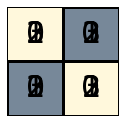

In [26]:
%%time
r = Rejilla(N=2)
A = inorder_to_tree(r.reglas[2])
I = A.SATtabla()
if I != None:
    r.visualizar(I)
else:
    print('¡No hay solución!')

**Ejercicio 2:**

Corrija la regla 3 para que represente la restricción de manera apropiada.

In [29]:
def regla3(self):
    casillas = [(x,y) for x in range(self.N) for y in range(self.M)]
    lista = []
    for c in casillas:
        lista_o = []
        for n in range(self.N*self.M):
            lista_o.append(self.NenC.P([n,*c]))
        lista.append(Otoria(lista_o))
    return Ytoria(lista)

setattr(Rejilla, "regla3", regla3)

CPU times: total: 203 ms
Wall time: 214 ms


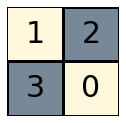

In [30]:
%%time
r = Rejilla(N=2)
A = inorder_to_tree(Ytoria(r.reglas))
I = A.SATtabla()
if I != None:
    r.visualizar(I)
else:
    print('¡No hay solución!')

---

# Situaciones más complejas y comparación de tiempos <a class="anchor" id="comp"></a>

([Volver al inicio](#inicio))

Observe que podemos cambiar los parámetros `N` y `M` para cambiar el tamaño de la rejilla:

In [ ]:
r = Rejilla(N=3, M=2)
I = {r.NenC.P([1,0,0]):True, r.NenC.P([1,1,0]):True}
r.visualizar(I)

Tal vez queramos aplicar el mismo algoritmo de solución a este problema más grande. No obstante, el tiempo de ejecución es prohibitivo:

In [ ]:
%%time
r = Rejilla(N=3, M=2)
A = inorder_to_tree(Ytoria(r.reglas))
I = A.SATtabla()
r.visualizar(I)

Este es un problema muy serio. Ni siquiera el algoritmo de los tableros semánticos puede venir a rescatarnos (observe que el objeto `Formula` ya trae implementado el `SATtableaux`):

In [ ]:
%%time
r = Rejilla(N=3, M=2)
A = inorder_to_tree(Ytoria(r.reglas))
I = A.SATtableaux()
r.visualizar(I)

---

## En este notebook usted aprendió

1. El esquema de solución de problemas mediante lógica proposicional.
2. Cada problema requiere una definición particular de sus restricciones y su implementación en lógica proposicional.
3. Cualquiera de estos problemas se resuelve (por lo menos de manera teórica) mediante el mismo algoritmo: un SATsolver.
4. Los SATsolvers que tenemos hasta este momento no son para nada eficientes, así que necesitamos algoritmos más poderosos.